**Batch Normalization** is a technique to improve the training of deep neural networks by `normalizing the inputs of each layer`.
It helps to stabilize and accelerate the training process by reducing **internal covariate shift**, which refers to the change in the distribution of network activations due to the updates of preceding layers during training.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [35]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [36]:
categorical_features = ['cut', 'color', 'clarity']
df = df.drop(columns=categorical_features, axis=1)
df.head(3)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31


In [37]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

### Model 1: Without Batch Normalizaion

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history1 = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


c:\Users\LENOVO\miniconda3\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1079/1079 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 6576537.0000 - mae: 1394.5604 - val_loss: 2149175.5000 - val_mae: 891.7632
Epoch 2/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2349423.7500 - mae: 879.0255 - val_loss: 2104338.7500 - val_mae: 865.7374
Epoch 3/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2279310.0000 - mae: 851.1470 - val_loss: 2082524.1250 - val_mae: 844.2341
Epoch 4/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2225790.5000 - mae: 836.4926 - val_loss: 2075277.7500 - val_mae: 831.0489
Epoch 5/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2205305.2500 - mae: 832.8823 - val_loss: 2075306.3750 - val_mae: 829.9167
Epoch 6/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2182266.0000 - mae: 830.3016 - val_loss: 2084235.6250 - val_mae: 835.0903
Epoch 7/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2163479.2500 - mae: 828.8199 - val_loss: 2107483.0000 - val_mae: 846.0073
Epoch 8/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - lo

### Model 2: With Batch Normalization

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50


c:\Users\LENOVO\miniconda3\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1079/1079 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 30752380.0000 - mae: 3906.8245 - val_loss: 30169408.0000 - val_mae: 3891.9504
Epoch 2/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 28278620.0000 - mae: 3758.6064 - val_loss: 26705164.0000 - val_mae: 3682.2659
Epoch 3/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 24397282.0000 - mae: 3493.0137 - val_loss: 22566586.0000 - val_mae: 3368.1824
Epoch 4/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 19866960.0000 - mae: 3142.8577 - val_loss: 17559982.0000 - val_mae: 3001.6426
Epoch 5/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 15247185.0000 - mae: 2729.1814 - val_loss: 12981829.0000 - val_mae: 2519.9326
Epoch 6/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 11008559.0000 - mae: 2276.3149 - val_loss: 9944534.0000 - val_mae: 2158.8870
Epoch 7/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 7631830.0000 - mae: 1826.7318 - val_loss: 4858475.0000 - val_mae: 1494.3646
Epoch 8/50
1079/1079 ━━━━━━━━━━━━━

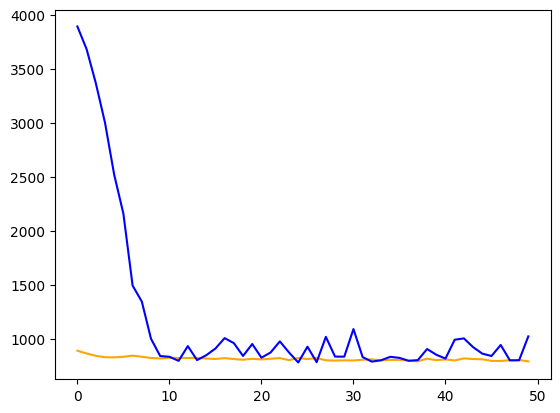

In [41]:
plt.plot(history1.history['val_mae'], label='Without BatchNorm', color='orange')
plt.plot(history.history['val_mae'], label='With BatchNorm', color='blue')